# Trends in SAT and ACT Participation, 2017-18

The ACT has been outpacing the SAT in participation in recent years, steadily gaining ground across the country.  The College Board implemented some major design changes to the SAT in 2016, in an attempt to revitalize their test.  Here we take a look at SAT and ACT participation and scoring data by state in 2017 and 2018, to see if we can glean any strategies the College Board might employ to increase SAT participation moving forward.  

## Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#2017-18-SAT/ACT-Data-Dictionary)
- [Exploratory Data Analysis](#Exploring-The-Data)
- [First Impressions: The ACT is Winning](#First-Impressions:-The-ACT-is-Winning)
- [Visualizing the Effect of Selection Bias](#Visualizing-the-Effect-of-Selection-Bias)
- [Mapping Test Preference in Tableau](#Mapping-2018-SAT/ACT-Preference-by-State-in-Tableau)
- [Identifying SAT Target States](#Identifying-Target-States-for-SAT-Growth)
- [Notes on Individual States](#Notes-on-Individual-States)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Packages

In [2]:
# Import NumPy and Pandas.
import numpy as np
import pandas as pd

# Import matplotlib.pyplot and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Import and Cleaning

Data Sources:
- [2017 SAT Scores and Participation by State](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [2017 ACT Scores and Participation by State](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)
- [2018 SAT Suite of Assessments, Annual Report](https://reports.collegeboard.org/pdf/2018-total-group-sat-suite-assessments-annual-report.pdf)
- [Average ACT Scores by State, 2018](https://reports.collegeboard.org/pdf/2018-total-group-sat-suite-assessments-annual-report.pdf)

In [3]:
#Read in 2017 SAT and ACT data:
sat_2017 = pd.read_csv('data/sat_2017.csv')
act_2017 = pd.read_csv('data/act_2017.csv')

In [4]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [5]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [6]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [7]:
act_2017.describe()

,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308,21.509615
std,2.332132,1.963602,2.048672,1.723351,2.002083
min,16.300000,18.000000,18.100000,18.200000,17.800000
25%,19.000000,19.400000,20.475000,19.975000,19.800000
50%,20.550000,20.900000,21.700000,21.300000,21.400000
75%,23.300000,23.100000,24.125000,23.200000,23.600000
max,25.500000,25.300000,26.000000,24.900000,25.500000


For the SAT, we have for each state, the 2017 participation rate (given as a percentage), mean reading/writing score, mean math score, and mean total score (An individual's SAT total score is simply the sum of the two section scores).  The mean scores have been provided rounded to the nearest whole number, therefore the average section scores will not necessarily sum exactly to produce the average total score for each state. 

For the ACT, we have for each state, the 2017 participation rate (given as a percentage), scores for English, Math, Reading, Science, and then the Composite Score (An individual's composite score is the average of their four sectional test scores, rounded to the nearest whole number).  The mean scores have been provided rounded to the nearest tenth of a decimal point.

The .describe() commands above provide basic descriptive statistics for each column in the two dataframes, including mean, standard deviation, minimum and maximum values, as well as Q1, median, and Q3 percentile values.  

The data look complete, if not perfectly clean.  Excluding a national averages row in the ACT table, there appear to be 51 rows in each table corresponding to the 50 states and the District of Columbia.  No values are missing in any of the data columns for either dataframe.

SAT subsection scores range from 200 to 800. ACT scores for subsections range from 1 to 36, with average score typically close to 20 for each section. The summary statistics do not show any evidence of bad data in this context.

One thing we do need to do is convert the participation percentages into numerical format.

In [8]:
#This function takes a string-type percentage, removes the percentage symbol, converts the remaining number to a float, 
#and divides by 100 to return the numerical representation of the percentage.
def participation_to_numeric(percentage_string):
    participation = float(percentage_string[:-1])/100   
    return participation

#Converts the participation percentages into numerical format
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: participation_to_numeric(x))
act_2017['Participation'] = act_2017['Participation'].map(lambda x: participation_to_numeric(x))

#The ACT dataframe contains a row with national averages.  This can be removed.
act_2017.drop(0,inplace=True)

#Keeps the index lined up with the SAT dataframe index.
act_2017.reset_index(drop=True,inplace=True)  

Checking data types (Everything looks correct) and renaming columns for clarity later on:

In [9]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [10]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [11]:
#Rename SAT columns
sat_2017.rename(columns={
    'State':'state',
    'Participation':'sat_participation_17',
    'Evidence-Based Reading and Writing':'sat_reading_writing_17',
    'Math':'sat_math_17',
    'Total':'sat_total_17'
},inplace=True)

#Rename ACT columns
act_2017.rename(columns={
    'State':'state',
    'Participation':'act_participation_17',
    'English':'act_english_17',
    'Math':'act_math_17',
    'Reading':'act_reading_17',
    'Science':'act_science_17',
    'Composite':'act_composite_17'
},inplace=True)

In [12]:
#Merge the SAT and ACT dataframes into a single 2017 table:
sat_act_2017 = sat_2017.merge(act_2017,how="outer",on=['state'])

In [13]:
sat_act_2017.head()

,state,sat_participation_17,sat_reading_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [15]:
#Save the merged dataframe
sat_act_2017.to_csv('data/sat_act_2017.csv')

### Adding in 2018 Data

In [17]:
#In preparing the CSV file, I combined the 2018 ACT and SAT data into a single file with analogous variables to the existing 2017 dataframe.
sat_act_2018 = pd.read_csv('data/sat_act_2018.csv')

#Convert percentage data to numeric format
sat_act_2018['sat_participation_18'] = sat_act_2018['sat_participation_18'].map(lambda x: participation_to_numeric(x))
sat_act_2018['act_participation_18'] = sat_act_2018['act_participation_18'].map(lambda x: participation_to_numeric(x))

In [18]:
sat_act_2018.describe()   #checking to make sure there are no odd min or max values that might be incorrect entries.

,sat_participation_18,sat_reading_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.452353,567.705882,558.450980,1126.156863,0.617255,21.496078
std,0.373007,45.311056,49.464862,94.444136,0.340371,2.111583
min,0.020000,497.000000,480.000000,977.000000,0.070000,17.700000
25%,0.045000,535.000000,521.500000,1063.000000,0.285000,19.950000
50%,0.480000,554.000000,547.000000,1099.000000,0.660000,21.300000
75%,0.775000,616.500000,601.000000,1220.000000,1.000000,23.650000
max,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000


In [19]:
sat_act_2018.dtypes     #confirming that data types are correct.  Everything looks good.

state                      object
sat_participation_18      float64
sat_reading_writing_18      int64
sat_math_18                 int64
sat_total_18                int64
act_participation_18      float64
act_composite_18          float64
dtype: object

In [20]:
#Combines 2017 and 2018 data into a single dataframe, joining on state names.
final_sat_act = sat_act_2017.merge(sat_act_2018,how="outer",on=['state'])

## 2017-18 SAT/ACT Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|SAT/ACT|State|
|**sat_participation_17**|*float*|SAT|Statewide SAT Participation Rate, 2017|
|**sat_reading_writing_17**|*integer*|SAT|State mean score, SAT Reading/Writing (200-800), 2017|
|**sat_math_17**|*integer*|SAT|State mean score, SAT Math (200-800), 2017|
|**sat_total_17**|*integer*|SAT|State mean total SAT score (400-1600), 2017|
|**act_participation_17**|*float*|ACT|Statewide ACT Participation Rate, 2017|
|**act_english_17**|*float*|ACT|State mean score, ACT English (1-36), 2017|
|**act_math_17**|*float*|ACT|State mean score, ACT English (1-36), 2017|
|**act_reading_17**|*float*|ACT|State mean score, ACT Reading (1-36), 2017|
|**act_science_17**|*float*|ACT|State mean score, ACT Science (1-36), 2017|
|**act_composite_17**|*float*|ACT|State mean ACT Composite Score (1-36), 2017|
|**sat_participation_18**|*float*|SAT|Statewide SAT Participation Rate, 2018|
|**sat_reading_writing_18**|*integer*|SAT|State mean score, SAT Reading/Writing (200-800), 2018|
|**sat_math_18**|*integer*|SAT|State mean score, SAT Math (200-800), 2018|
|**sat_total_18**|*integer*|SAT|State mean total SAT score (400-1600), 2018|
|**act_participation_18**|*float*|ACT|Statewide ACT Participation Rate, 2018|
|**act_composite_18**|*float*|ACT|State mean ACT Composite Score (1-36), 2018|

NOTE: 2018 scoring data for individual sections of the ACT were not yet available at the time of this analysis.

## Exploring the Data

### Lowest and Highest SAT participation states, 2017 and 2018

In [21]:
#Lowest SAT participation states, 2017
final_sat_act.sort_values('sat_participation_17')[['state','sat_participation_17']].head()

,state,sat_participation_17
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [22]:
#Highest SAT participation states, 2017
final_sat_act.sort_values('sat_participation_17',ascending=False)[['state','sat_participation_17']].head()

,state,sat_participation_17
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


Here we can see that North Dakota, Mississippi, and Iowa had the lowest participation rates in the 2017 SAT (only 2%), while D.C., Michigan, Connecticut, and Delaware all had 100% participation rates.

In [23]:
#Lowest SAT participation states, 2018
final_sat_act.sort_values('sat_participation_18')[['state','sat_participation_18']].head()

,state,sat_participation_18
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In [24]:
#Highest SAT participation states, 2018
final_sat_act.sort_values('sat_participation_18',ascending=False)[['state','sat_participation_18']].head()

,state,sat_participation_18
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
12,Idaho,1.00
19,Maine,0.99


North Dakota again tops the list for lowest participation in the 2018 SAT (2%).  Michigan, Connecticut, and Delaware all show 100% participation rates again, as well as Idaho, which had been 93% the previous year.  At a glance, it appears that the same states show similar rates year to year.  Moreover, the difference is not strictly regional.  Michigan has 100% participation both years, while demographically similar and geographically nearby Wisconsin has participation of only 3% for both years.  This suggests that state policies for test taking requirements or state reporting may be playing a significant role in the participation numbers.

### Lowest and Highest ACT Participation Rates, 2017 and 2018

In [25]:
#Highest ACT participation states, 2017
final_sat_act.sort_values('act_participation_17')[['state','act_participation_17']].head()

,state,act_participation_17
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In [26]:
#Lowest ACT participation states, 2017
final_sat_act.sort_values('act_participation_17',ascending=False)[['state','act_participation_17']].head(20)

,state,act_participation_17
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


Here we can see a few things.  First, **the ACT seems to have a higher minimum participation rate across the country**.  Maine is the lowest in 2017, at 8%, aside from that the second lowest is New Hampshire at 18%.  This is a marked difference from the 15-20 states with SAT participation rates under 5%.  It appears that **while the SAT is almost completely irrelevant in certain states, the ACT has a baseline following nationwide**.  Perhaps this can be explained by students who want to demonstrate proficiency in science.  Or perhaps states or regions where the SAT is the test of record have more developed college preparatory programs that produce a greater portion of students seeking to take both tests.  

Second, we see that a full **17 states have 100% participation rates for the ACT in 2017**. This introduces a third possibility, that the ACT is simply outpacing the popularity of the SAT altogether.  

Finally, it is worth noting that in most cases, **a state with high participation in one test tends toward lower participation in the other**.

In [27]:
#Lowest ACT participation states, 2018
final_sat_act.sort_values('act_participation_18')[['state','act_participation_18']].head()

,state,act_participation_18
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


Similar ACT participation rates prevail across most states in 2018, with around 20 states again having 100% participation. Maine continues to have the lowest ACT participation, down to 7%, followed by Rhode Island, New Hampshire and Delaware.  

### Highest and Lowest Mean SAT Scores by State, 2017 and 2018

In [28]:
#Lowest SAT Scores, 2017
final_sat_act.sort_values('sat_total_17')[['state','sat_total_17','sat_participation_17']].head()

,state,sat_total_17,sat_participation_17
8,District of Columbia,950,1.00
7,Delaware,996,1.00
12,Idaho,1005,0.93
22,Michigan,1005,1.00
19,Maine,1012,0.95


In [29]:
#Lowest SAT Scores, 2018
final_sat_act.sort_values('sat_total_18')[['state','sat_total_18','sat_participation_18']].head()

,state,sat_total_18,sat_participation_18
8,District of Columbia,977,0.92
7,Delaware,997,1.00
48,West Virginia,999,0.28
12,Idaho,1001,1.00
22,Michigan,1010,1.00


In [30]:
#Highest SAT Scores, 2017
final_sat_act.sort_values('sat_total_17',ascending=False)[['state','sat_total_17','sat_participation_17']].head()

,state,sat_total_17,sat_participation_17
23,Minnesota,1295,0.03
49,Wisconsin,1291,0.03
15,Iowa,1275,0.02
25,Missouri,1271,0.03
16,Kansas,1260,0.04


In [31]:
#Highest SAT Scores, 2018
final_sat_act.sort_values('sat_total_18',ascending=False)[['state','sat_total_18','sat_participation_18']].head()

,state,sat_total_18,sat_participation_18
23,Minnesota,1298,0.04
49,Wisconsin,1294,0.03
34,North Dakota,1283,0.02
25,Missouri,1272,0.04
15,Iowa,1265,0.03


The four frames above show the states with the highest mean SAT scores in 2017/18, followed by the lowest. We can see immediately that states appear to occupy the same place year to year.  What jumps out also is that the states with the lowest mean SAT scores (D.C., Delaware, Idaho, Michigan) are among the states with the highest SAT participation rates.  Meanwhile the states with the highest mean SAT scores (Minnesota, Wisconsin, North Dakota, Missouri, Iowa) all have very low participation rates in the test.  The culprit here is **selection bias**.  Students who bother to take the SAT test (most likely in addition to the ACT) in ACT-dominated states tend to be higher-achieving students, in particular students who are pursuing out of state college applications that may require SAT results.  Therefore higher mean SAT scores are not necessarily representative of a better education system.  One exception here is West Virginia, which shows low end SAT scores in spite of low end participation rates.  This is cause for concern.

### Highest and Lowest Mean ACT Composite Scores by State, 2017 and 2018

In [32]:
#Lowest ACT Scores, 2017
final_sat_act.sort_values('act_composite_17')[['state','act_composite_17','act_participation_17']].head()

,state,act_composite_17,act_participation_17
28,Nevada,17.8,1.0
24,Mississippi,18.6,1.0
40,South Carolina,18.7,1.0
11,Hawaii,19.0,0.9
33,North Carolina,19.1,1.0


In [33]:
#Lowest ACT Scores, 2018
final_sat_act.sort_values('act_composite_18')[['state','act_composite_18','act_participation_18']].head()

,state,act_composite_18,act_participation_18
28,Nevada,17.7,1.00
40,South Carolina,18.3,1.00
24,Mississippi,18.6,1.00
11,Hawaii,18.9,0.89
0,Alabama,19.1,1.00


In [34]:
#Highest ACT Scores, 2017
final_sat_act.sort_values('act_composite_17',ascending=False)[['state','act_composite_17','act_participation_17']].head()

,state,act_composite_17,act_participation_17
29,New Hampshire,25.5,0.18
21,Massachusetts,25.4,0.29
6,Connecticut,25.2,0.31
19,Maine,24.3,0.08
8,District of Columbia,24.2,0.32


In [35]:
#Highest ACT Scores, 2018
final_sat_act.sort_values('act_composite_18',ascending=False)[['state','act_composite_18','act_participation_18']].head()

,state,act_composite_18,act_participation_18
6,Connecticut,25.6,0.26
21,Massachusetts,25.5,0.25
29,New Hampshire,25.1,0.16
32,New York,24.5,0.27
22,Michigan,24.2,0.22


ACT data show a similar effect.  States with high mean ACT composite scores tend to be those with lower participation rates, and vice versa.  

However, there are some exceptions, and within the strata of, for example, states with 100% ACT participation, there is variation in mean composite score that is not confounded by the selection bias.  Minnesota, for example, despite 100% participation, ranks 23rd in ACT mean composite score in 2017.  

### States with >50% Participation on Both Tests

In [36]:
#this filter looks at all states with a participation rate of at least 50% on both the ACT and SAT in 2017
final_sat_act[(final_sat_act['act_participation_17'] > 0.5) & (final_sat_act['sat_participation_17'] > 0.5)][['state','sat_participation_17','act_participation_17']]

,state,sat_participation_17,act_participation_17
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


In [37]:
#this filter looks at all states with a participation rate of at least 50% on both the ACT and SAT in 2018
final_sat_act[(final_sat_act['act_participation_18'] > 0.5) & (final_sat_act['sat_participation_18'] > 0.5)][['state','sat_participation_18','act_participation_18']]

,state,sat_participation_18,act_participation_18
9,Florida,0.97,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


The above two frames show that Florida, Georgia and Hawaii were the only states with greater than 50% participation on both the SAT and ACT in 2017.  None of these three has mandatory testing for one of the two tests.  Of the three, Hawaii scored best on the SAT, while Georgia scored best on the ACT, both in 2017 and 2018.  North Carolina and South Carolina, two states that appear to require ACT testing, each eked above 50% SAT participation in 2018 to join these three in this category.

### High Achieving States

In [38]:
#States with participation rate of at least 50% and total score of at least 1100 on the SAT in 2018
final_sat_act[(final_sat_act['sat_participation_18'] > 0.5) & (final_sat_act['sat_total_18'] > 1100)][['state','sat_participation_18','sat_total_18']]

,state,sat_participation_18,sat_total_18
21,Massachusetts,0.80,1125
40,South Carolina,0.55,1106
45,Vermont,0.64,1119
46,Virginia,0.68,1117


In [39]:
#States with participation rate of at least 50% and total score of at least 21 on the ACT in 2018
final_sat_act[(final_sat_act['act_participation_18'] > 0.5) & (final_sat_act['act_composite_18'] > 21)][['state','act_participation_18','act_composite_18']]

,state,act_participation_18,act_composite_18
10,Georgia,0.53,21.4
15,Iowa,0.68,21.8
16,Kansas,0.71,21.6
23,Minnesota,0.99,21.3
41,South Dakota,0.77,21.9


The states in the frames above have high participation rates AND high scores for their respective tests in 2018.  These might be regarded as some of the better achieving states overall. 

### Significant Changes in SAT Participation, 2017-18

In [40]:
#This code adds a column to the dataframe to represent the change in SAT participation from 2017 to 2018
#and then sorts the dataframe by that column to show the states with the largest gains in the past year.
final_sat_act['sat_participation_change']=final_sat_act['sat_participation_18'] - final_sat_act['sat_participation_17']
final_sat_act.sort_values('sat_participation_change',ascending=False)[['state','sat_participation_17','sat_participation_18','sat_participation_change']].head(10)

,state,sat_participation_17,sat_participation_18,sat_participation_change
13,Illinois,0.09,0.99,0.90
39,Rhode Island,0.71,0.97,0.26
5,Colorado,0.11,0.28,0.17
48,West Virginia,0.14,0.28,0.14
9,Florida,0.83,0.97,0.14
30,New Jersey,0.70,0.82,0.12
32,New York,0.67,0.79,0.12
10,Georgia,0.61,0.70,0.09
20,Maryland,0.69,0.76,0.07
12,Idaho,0.93,1.00,0.07


Here we show the ten states with the largest increase in SAT participation from 2017 to 2018.  Identifying states where SAT growth has been on the rise may provide hints for the College Board about which type of state to target in future.

Illinois has experienced a massive increase in participation between 2017 and 2018, essentially trading the ACT for the SAT, as ACT participation fell from 93% to 43%, while SAT participation went from 9% to 99%.  Colorado has also seen significant gains in SAT participation, likely due to removing the ACT as mandatory.  Rhode Island and Florida have both shown increases from 70-85% to near perfect participation (97%). West Virginia, meanwhile, despite showing poor scores for such a low participation rate in 2017, shows promise as an area for SAT growth, rising from 14 to 28% participation in 2018, while ACT rates fell from 69% to 65%, seemingly in the absence of any policy requirements.

Elsewhere, with the ACT, states like Nebraska and Ohio are up to 100% ACT participation in 2018, from 84% and 75% ACT rates in 2017, respectively. This is likely also the result of policy changes, in this case making ACT testing mandatory.

### Summary Statistics

In [41]:
#Transposing the describe function gives a clean stat summary for each numeric variable across the states
final_sat_act.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_reading_writing_17,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_17,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_17,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_participation_17,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_english_17,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_17,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_reading_17,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_17,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_composite_17,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


Looking at the descriptive statistics above, we have the mean and median to indicate center, the std and quartiles to indicate spread, the min and max to indicate range, and between the mean and median we can look for evidence of skew.  A median significantly below the mean will suggest right skew, and significantly above the mean will suggest left skew.

ACT composite scores from both years and ACT section scores (6 categories total) all have comparable means between 20.9 (act english 17) and 22.0 (act reading 17).  Standard deviations are all somewhat comparable as well, ranging from a minimum of 1.98 (act math 17) to a maximum stdev of 2.35 (act english 17).  The interquartile range for each of the ACT score distributions is comparable, about 4 points. Furthermore in all of these distributions the mean exceeds the median by between 0.1 and 0.3, suggesting a relatively skewless distribution, maybe a faint right skew if anything.  For SAT scores, meanwhile, we can see that the means for SAT reading are 569 and 567 respectively, and for SAT math 557 and 559, suggesting reproducible results in which the SAT reading score averages slightly higher.  Medians are around 10 points lower in all cases, again suggesting only faint right skew.  Stdevs are comparable (45-49) and interquartile ranges are similar sizes, suggesting consistent spread. 

However, a look at the histograms indicate that while Math scores for both tests loosely resemble a normal distribution, albeit with the faint right skew described, reading scores for SAT and ACT are distinctly non-normal, showing a bimodal distribution, with a peak just below the center of the distribution and then a smaller peak on the higher end of the distribution. The limitations of summary statistics in describing distributions are apparent.

The SAT total score data both show means of 1126, with stdevs of 92 and 94 respectively, in proportion to the stdev of the composing section score data.  The median is again a bit lower than the mean, suggesting slight right skew.  It's worth noting for the SAT score distributions that the 25-50% quartile in all cases is about half the width of the 50-75% quartile, indicating that there is in fact some right skew, and that the scores are more narrowly concentrated in the 25-50th percentile. This effect is also seen, albeit to a lesser degree, in the ACT score distributions, particularly the composite scores.

Finally, looking at the participation proportion distributions for ACT and SAT, we see SAT participation has mean of 0.39 in 2017 and 0.45 in 2018.  ACT participation has mean of 0.65 in 2017, 0.62 in 2018.  So we can see that the SAT made modest gains in 2018.  Contrary to the statistical distributions for the various scores, the bodies of which were concentrated well with their possible range, the participation means have stdevs that are large relative to the mean.  Both tests show participation stdevs in the 0.3 - 0.4 range.  A look at the histogram indicates that the distributions of both SAT and ACT scores are roughly trimodal.  SAT has a large peak around 0 and a smaller peak around 1, ACT has the opposite.  Each have a third peak centrally, with the SAT's around 0.6 and the ACT's around 0.3.

### Correlation Heatmap

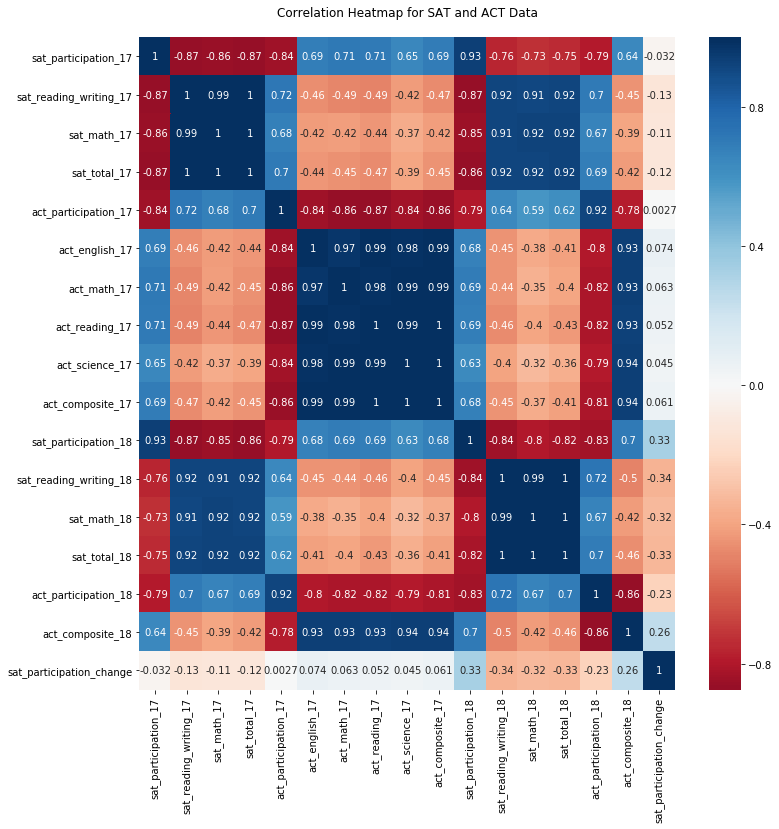

In [42]:
#Seaborn Heatmap visualizes correlation between all numeric features
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(final_sat_act.corr(),annot=True,cmap="RdBu", center=0)
ax.set_title('Correlation Heatmap for SAT and ACT Data\n');

No tremendous surprises here, given the selection bias discussed earlier.  

- **Mean scores on a given test are highly negatively correlated with participation rate on that test (r ~ -0.8)**. This directly indicates the selection bias effect.  Lower participation typically means higher mean scores, and vice versa, due to higher achieving students on average taking the test.

- **Mean scores on sections of a given test are highly correlated (r ~ 0.9 to 1.0) with mean scores for other sections of that test, or total scores for that test**.  If a state performs well on the SAT because they have low participation or simply because they are higher achieving, it's likely they perform well on all sections.  This holds across years too, as most states have similar profiles in 2018 as they did in 2017.  Participation rates for the same test across years are highly correlated.

- **Mean scores on sections of the SAT are moderately negatively correlated with mean scores on ACT, and vice versa (r ~ -0.6)**.  This is the result of the selection bias effect as well (e.g.; higher scores on SAT > lower SAT participation rate > higher ACT participation rate > lower ACT scores).  The negative correlation here is softened by the fact that in true high achieving states like Massachusetts, or lower achieving states like West Virginia, you expect some positive relationship to exist between SAT and ACT scores.  But this positive correlation is dominated by the negative correlation resulting from the selection bias effect.

- **Participation rate on a given test is moderately positively correlated with scores on the opposite test (r ~ 0.6)**. Again this is simply due to higher participation on SAT > lower participation on ACT > higher ACT scores.  So, positive correlation between SAT participation and ACT scores.

### Bimodality of Score Distributions

Below we define a function that allows us to plot side by side distributions of different variables in our dataset.

In [43]:
#Defines a function to plot histograms showing comparative distributions of variables in a dataframe
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, figsize_tuple, bins_range = None):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=figsize_tuple,nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=bins_range) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])# Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])

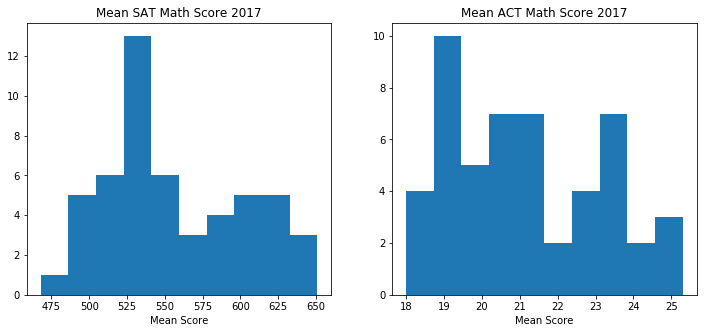

In [44]:
subplot_histograms(
    final_sat_act,
    ['sat_math_17','act_math_17'],
    ['Mean SAT Math Score 2017','Mean ACT Math Score 2017'],
    ['Mean Score','Mean Score'],
    (12,5)
)

We can see here that Mean SAT Math score is slightly bimodal, with a peak around 535, a valley around 575, and a second, smaller peak in the 600s, suggesting that there is a cluster of states with better math scores.  It would be interesting to see this plotted against SAT participation rate.  It's likely that this second peak reflects higher mean performance in the group of low-participation states. The ACT Math Score has a faintly similar distribution in its Mean Math Score, albeit with a less defined peak. But it appears that in both cases there may be a cluster of high-participation state scores and a cluster of low-participation state scores.  Similar distributions appear on other sections of the two tests, with faint to stark bimodality.

## First Impressions: The ACT is Winning

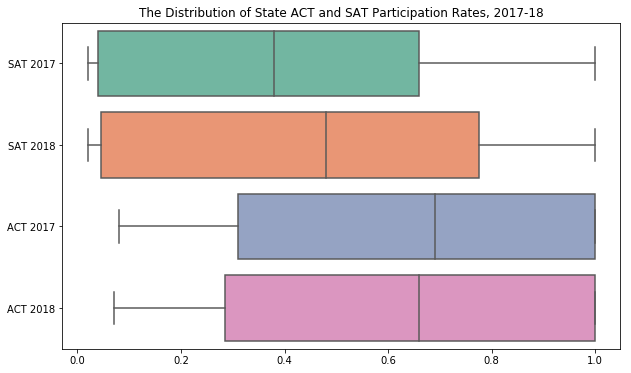

In [45]:
#Boxplot for ACT and SAT participation rates, 2017 and 2018 (4 vars)
participation_rates = final_sat_act.loc[:,['sat_participation_17','sat_participation_18','act_participation_17','act_participation_18']]
participation_rates = participation_rates.rename(columns={
    'sat_participation_17':'SAT 2017',
    'sat_participation_18':'SAT 2018',
    'act_participation_17':'ACT 2017',
    'act_participation_18':'ACT 2018'
})
plt.figure(figsize=(10,6))
plt.title('The Distribution of State ACT and SAT Participation Rates, 2017-18')
sns.boxplot(data=participation_rates,orient='h',palette='Set2');

As we can see in the summary statistics above, and visualized clearly in this boxplot, the distribution of ACT participation rate across the 50 states is centered significantly higher than that of the SAT.  The following histograms provide more clarity about the nature of these distributions.

### Comparing Distribution of SAT and ACT Participation Rates, 2017 and 2018

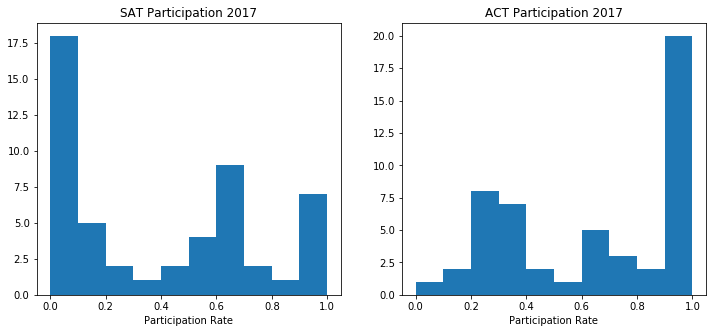

In [47]:
subplot_histograms(
    final_sat_act,
    ['sat_participation_17','act_participation_17'],
    ['SAT Participation 2017','ACT Participation 2017',],
    ['Participation Rate','Participation Rate'],
    (12,5),
    [0.1*i for i in range(0,11)]  #This was included to make equal bins at the tenth percentiles from 0 to 100
)

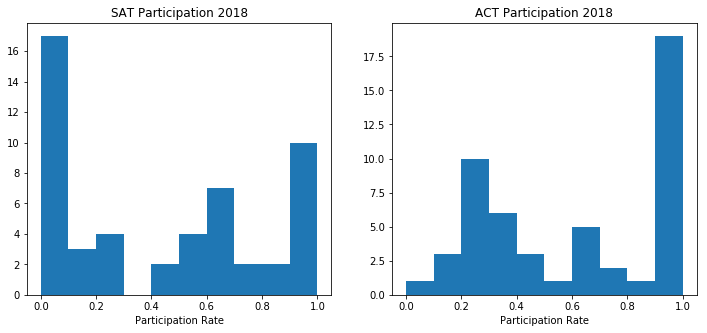

In [48]:
subplot_histograms(
    final_sat_act,
    ['sat_participation_18','act_participation_18'],
    ['SAT Participation 2018','ACT Participation 2018',],
    ['Participation Rate','Participation Rate'],
    (12,5),
    [0.1*i for i in range(0,11)]  #This was included to make equal bins at the tenth percentiles from 0 to 100
)
plt.show()

In these plots we can see that the distributions for SAT participation rate and ACT participation rate have not changed dramatically from 2017 to 2018.  It is also clear that the SAT has a large group of very low-end participation rates (<10%), a cluster of states with participation in the 50-75% range, and then a group of states with 100% participation.  The ACT, by contrast, has almost no states with lower than 10% participation, has a cluster of states in the 15-35% range, only a small number of states in the mid to high range, and then a large group of states with at or near 100% participation.  In this way the two distributions almost mirror each other.  

Again though, this speaks to the recent success of the ACT.

## Visualizing the Effect of Selection Bias

In [49]:
#Defines a function to create a scatterplot between two variables
def subplot_scatterplot(column1,column2,xlabel,ylabel,title):
    f = plt.figure(figsize=(8,5))
    sns.set_style('whitegrid')
    sns.scatterplot(x=final_sat_act[column1],y=final_sat_act[column2])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

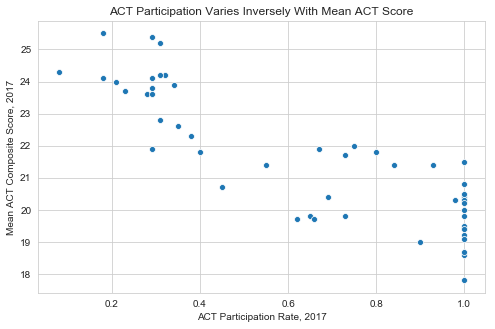

In [50]:
subplot_scatterplot('act_participation_17','act_composite_17','ACT Participation Rate, 2017',
                    'Mean ACT Composite Score, 2017','ACT Participation Varies Inversely With Mean ACT Score')

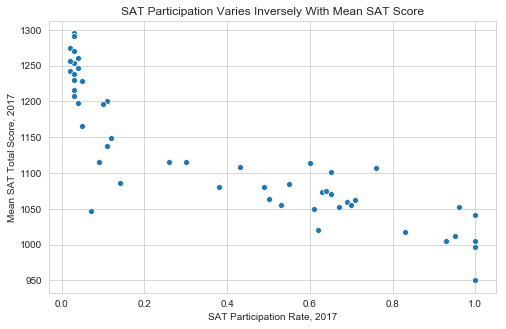

In [51]:
subplot_scatterplot('sat_participation_17','sat_total_17','SAT Participation Rate, 2017',
                    'Mean SAT Total Score, 2017','SAT Participation Varies Inversely With Mean SAT Score')

These two scatterplots clearly demonstrate the relationship between participation rate and test scoring.  For both tests, lower rates of participation correspond with higher mean score by state. This is due to the selection bias I've discussed earlier in the notebook.  In the SAT plot, for instance, you can see the cluster of ACT-dominated states at top left where SAT participation is very low and mean scores are all >1200.  The small subset of high achieving students that bother to take both tests are high scorers, and so these states have artificially higher score averages.  The downward slope of both graphs indicates the negative association between the variables.

## Mapping 2018 SAT/ACT Preference by State in Tableau

Here I created a divergent chloropleth map of the contiguous US states. It is based on the difference between SAT and ACT participation rates in each state (SAT 2018 participation minus ACT 2018 participation, creating a range from -1 (total ACT preference) to +1 (total SAT preference)).  Thus the color map indicates preference for one test or the other by depth of color, red (ACT) or blue (SAT). I chose these colors intentionally, to underline a pattern I had observed that politically conservative states tend to lean ACT, while more liberal states seem to lean SAT.  The Tableau interactive, with individual state data available on hover, can be found [here](https://public.tableau.com/profile/eamon.fleming#!/vizhome/SATvsACTParticipationbyState/Sheet1?publish=yes).

#### SAT Predominant States in Blue, ACT Predominant States in Red

<img src="images/preferencemap.png" />



Below is a third party map of the political redness or blueness of states as a composite of the last four presidential elections.  One can see that the distribution of ACT and politically red states versus SAT and politically blue states nationwide is quite similar.  This led me to theorize that states that may be starting to lean liberal or that are traditional swing states, may also be more likely to consider the SAT over the ACT for testing.  It is worth noting that of the lower end states identified in the next section as potential SAT push states, most met these criteria as well (New Mexico, Ohio, Arizona, etc).  

<img src="images/political-map.jpg" width="700px" />

## Identifying Target States for SAT Growth

Using Tableau, I ran some key 2017 variables against each other in scatterplots, with change in SAT participation between 2017 and 2018 represented by color. The goal was to see if I could identify trends or clusters of SAT gain states that could help to identify states where the College Board might want to focus resources moving forward.

Below we have the mean SAT and ACT scores for each state plotted against SAT participation, all for 2017. Color indicates SAT participation gains in 2018. Deeper blue circles indicate larger gains in SAT participation over the following year.  Basically this plot represents the 2017 status quo and which states saw SAT participation gains from it.

<img src="images/satvsmeanscores.png" />

We can see that there are two clusters on the chart where SAT gains were made.  One cluster is comprised of states on the upper edge of the large group of low-SAT-participation states, i.e.; states with roughly 10-15% SAT participation. States like Colorado, Illinois, and West Virginia have all made gains here.  A second cluster that made gains in 2018 is comprised of states on the upper edge of the 50-75% participation bloc.  These include Rhode Island, New York, New Jersey, and Maryland.  You can see that in the valley area, or in the main part of these two distribution blocs, few gains were made.  

Therefore in moving forward, it may be helpful for the College Board to focus resources on similarly poised states in the 2018 version of this graph, i.e.; states on the upper edge of the lower-range and middle-range packs in the SAT participation distribution.

I have included below the 2018 version of this graph, uncolored of course as we cannot yet know gains for 2019.  I have circled dots that represent potential states of interest based on this layout.  The lower group is comprised of New Mexico, Ohio, and Montana, other states in the vicinity include Nevada and Arizona.  The upper target group is comprised of states like Georgia, Pennsylvania, Washington, and also some states like New York and Maryland that may still be on the rise.  

<img src="images/satvsmeanscoresB.png" />

## Notes on Individual States

### Evidence of Selection Bias Effect in Colorado and Illinois

Let's look more closely at Colorado and Illinois, which have both seen dramatic increases in SAT participation in the previous year.  Both states implemented mandatory SAT testing, leaving previous contracts with the ACT in order to do so.  In doing so, as mentioned above, they both saw significant decreases in SAT mean scores (Colorado 1201 to 1025, Illinois 1125 to 1019).  They also saw otherwise anomalous gains in ACT scoring, as many students that may have been poor performers in the ACT pool prior were shifted to the SAT pool with the changes.

To highlight these changes, I want to show these two plots:

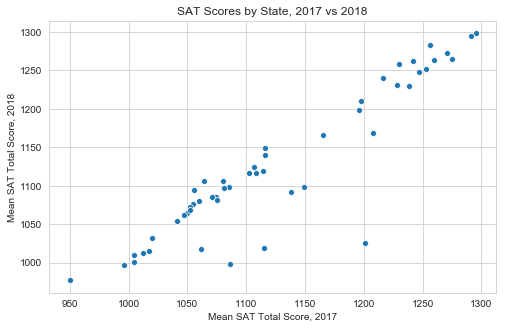

In [52]:
subplot_scatterplot('sat_total_17','sat_total_18','Mean SAT Total Score, 2017',
                    'Mean SAT Total Score, 2018','SAT Scores by State, 2017 vs 2018')

We observe here a high correlation between SAT Total score in 2017 and 2018 for each state.  There are a few exceptions where we see that states have dropped off from 2017 to 2018.  The most notable of these is Colorado, falling from 1201 to 1025.  This is likely attributable in part to a large increase in SAT participation (11% in 2017 to 28% in 2018), which might dilute the quality of the average score.  However, this fails to explain the scale of the drop entirely, given that Illinois (9% participation in 2017, 99% in 2018) only saw a drop from 1115 to 1019 with a much larger increase in participation.

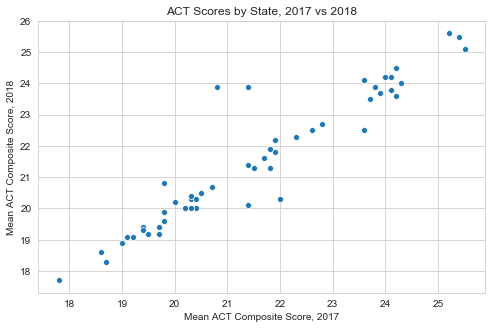

In [53]:
subplot_scatterplot('act_composite_17','act_composite_18','Mean ACT Composite Score, 2017',
                    'Mean ACT Composite Score, 2018','ACT Scores by State, 2017 vs 2018')

Again, we observe a high correlation between ACT Composite scores in 2017 and 2018 across the states.  Two outliers jump out, these states have both seen significant gains in ACT scores in the past year.  Perhaps unsurprisingly, these states are Illinois and Colorado again.  In conjunction with increases in SAT participation, these states both saw sizeable decreases in ACT participation, which has led to a higher mean score among those who do still take the test.

If you imagine fitting a predictive line to these two plots, predicting 2018 mean score based on 2017 mean score, you would see that Colorado and Illinois are represented on the first plot by the two points with the greatest decrease in SAT score relative to the prediction line, and in the second plot by the two points with the greatest increase in ACT score relative to the prediction line.  This reflects the changes discussed and shows the effect of selection bias on scoring very clearly and immediately.  As SAT participation went to 100% and ACT participation tumbled, SAT mean score fell off precipitously and ACT mean scores increased markedly.

### West Virginia and Oklahoma

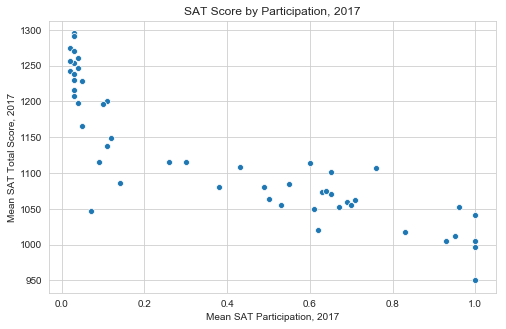

In [54]:
subplot_scatterplot('sat_participation_17','sat_total_17','Mean SAT Participation, 2017','Mean SAT Total Score, 2017','SAT Score by Participation, 2017')

With SAT participation of 14% in 2017, and mean SAT score of 1086, West Virginia was one of only two states with participation under 20% that still saw mean scores below 1100.  The other, Oklahoma, with 7% participation and mean scores below 1050, is even more abysmal.  **The list below shows all states with mean SAT scores below 1050 in 2017.** To make this list with only 7% test participation is unfortunate.

In [55]:
final_sat_act[final_sat_act['sat_total_17']<1050][['state','sat_participation_17','sat_total_17']].sort_values('sat_participation_17')

,state,sat_participation_17,sat_total_17
36,Oklahoma,0.07,1047
43,Texas,0.62,1020
9,Florida,0.83,1017
12,Idaho,0.93,1005
19,Maine,0.95,1012
6,Connecticut,1.00,1041
7,Delaware,1.00,996
8,District of Columbia,1.00,950
22,Michigan,1.00,1005


What makes West Virginia interesting, meanwhile, is that in 2018, it saw one of the largest leaps in SAT participation not involving a mandatory requirement: a 100% increase in participation, up to 0.28 from 0.14.  As expected, there was a drop in mean score accompanying this, down to 999.  As it turns out, this participation increase was the result of the combined effect of two changes: the ACT statewide contract ended without renewal in 2018, and West Virginia subsequently agreed to cover SAT test costs for all public school students.

## Conclusions and Recommendations

The ACT and SAT participation distributions roughly mirror each other, with states tending to prefer one test or the other. ACT shows a large group of highly committed states, and a higher baseline participation nationwide.  SAT shows a larger group of states with 50-80% particpation, as well as a smaller set of highly committed states.  The ACT has been doing quite well.

ACT and SAT scores are inversely correlated with their respective participation rates.  This is likely due to selection bias, as low participation means those who are participating tend to be higher achieving, and high participation means diluted quality of performance.

There are strong regional (and possibly political) affiliations associated with ACT versus SAT preference.  Coastal progressive states tend to favor the SAT, while Midwestern and Mountain conservative states tend to favor the ACT.

The SAT made clear gains in 2018 relative to the ACT.  The states making these gains tended to be states in the 10-15% participation range, at the upper edge of the lower bloc, or in the 70% range, at the upper edge of the middle bloc, in the distribution of SAT participation by state.  Targeting states in similar positions in the 2018 distribution should be promising  for the College Board moving forward.